In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# approximate dE/dz as a constant, pretty good approximation

dEdz = 1.5 # [cm2/g]
rho = 11.2 # [g/cm3]

l_target = 10 # [m]
target_bins = 1000
target_dz = l_target / target_bins

# #########################################
# ########## STEP 0: Config File ##########
# #########################################

# Beam Parameters
E_0 = 1500          # Beam Energy [GeV]
m_lepton = 0.105    # Colliding lepton mass [GeV] # DO NOT CHANGE
N_mu = 1e20         # Total number of muons on target

# Dump Parameters
theta_max = 1e-2                # Maximum allowed emission angle [rad] # DO NOT CHANGE
target_name = "Water"
target_Z = 10                # Target nucleus's electric charge
target_A = 18.02             # Target atomic mass [g/mol] ~ [GeV]
target_density = 1           # Target material density [g/cm3]
target_length = 10          # Length of target [m]
shield_length = 10          # Length of shield [m]
detector_length = 100       # Length of detector [m]

# Model Parameters
model_name_string = "darkX"
decay_dictionary = { # Format is [weight, mass]
                    "electrons" : [1, 0.000511],
                    "muons" : [1, 0.105],
                    "taus" : [1, 1.776],
                    "neutrinos" : [0, 0],
                    "hadrons" : [1, 0.105], # Weight gets multiplied by Rpp
                    }

# Calculation parameters
run_WW =  True                      # Whether to use the full WW approximation or just IWW
if E_0 > 50:
    run_WW = False                  # Highly recommended to set run_WW to False for large energies, takes forever otherwise!
xbins = 1000                    
cases = ["Scalar", "Pseudoscalar", "Vector", "Axial Vector"]    # DO NOT CHANGE
m_Xs = np.logspace(-3, 3, 25)       # Range of X masses to compute for interpolation


# Directories
cross_section_dir = f"experiments/{target_name}/cross_sections/"
experiment_dir = f"experiments/{target_name}/experiment_{model_name_string}_e{E_0}_t{target_length}_s{shield_length}_d{detector_length}/"

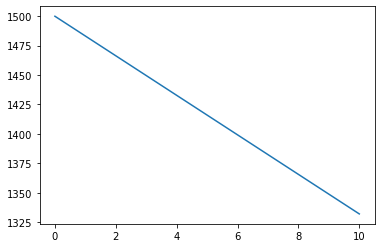

In [10]:
target_zs = np.linspace(0, target_length, target_bins)
Es = E_0 - target_zs * dEdz * rho
plt.plot(target_zs, Es)

In [7]:
muon_fraction = 1
x = 0.9

